In [1]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4==4.10.0']

[+] 0.0s
[+] 0.1s
pkgs/main/linux-64 ━━━━━━╸━━━━━━━━━━━━━━━╸━━   0.0 B /  ??.?MB @ 

In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [72]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

Question 1: Use yfinance to Extract Tesla Stock Data

In [73]:
tesla = yf.Ticker("TSLA")

In [74]:
tesla_share_price_data = tesla.history(period="max")

In [75]:
tesla_share_price_data.reset_index(inplace=True)

In [76]:
tesla_share_price_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0,0.0


Question 2: Use Webscraping to Extract Tesla Revenue Data

In [77]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

In [78]:
read_html_pandas_data = pd.read_html(url)
tesla_revenue = read_html_pandas_data[0]

In [79]:
tesla_revenue = tesla_revenue.rename(columns={"Tesla Annual Revenue(Millions of US $)": "Date", "Tesla Annual Revenue(Millions of US $).1": "Revenue"})

In [80]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

The default value of regex will change from True to False in a future version.



In [81]:
tesla_revenue.Revenue = tesla_revenue.Revenue.astype('int64')
tesla_revenue.Date = pd.to_datetime(tesla_revenue.Date, format='%Y')

In [82]:
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [83]:
tesla_revenue.tail()

,Date,Revenue
8,2013-01-01,2013
9,2012-01-01,413
10,2011-01-01,204
11,2010-01-01,117
12,2009-01-01,112


Question 3: Use yfinance to Extract Gamestop Stock Data

In [84]:
gme = yf.Ticker("GME")

In [85]:
gme_share_price_data = gme.history(period="max")
gme_share_price_data.reset_index(inplace=True)

In [86]:
gme_share_price_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


Question 4: Use Webscraping to Extract Gamestop Revenue Data

In [87]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

In [88]:
read_html_pandas_data = pd.read_html(url)
gme_revenue = read_html_pandas_data[0]

In [89]:
gme_revenue = gme_revenue.rename(columns={"GameStop Annual Revenue(Millions of US $)": "Date", 
                                          "GameStop Annual Revenue(Millions of US $).1": "Revenue"})

In [90]:
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"")

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

The default value of regex will change from True to False in a future version.



In [91]:
gme_revenue.Revenue = tesla_revenue.Revenue.astype('int64')
gme_revenue.Date = pd.to_datetime(tesla_revenue.Date, format='%Y')

In [92]:
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

In [93]:
gme_revenue.tail()

,Date,Revenue
8,2013-01-01,2013.0
9,2012-01-01,413.0
10,2011-01-01,204.0
11,2010-01-01,117.0
12,2009-01-01,112.0


Question 5: Plot Tesla Stock Graph

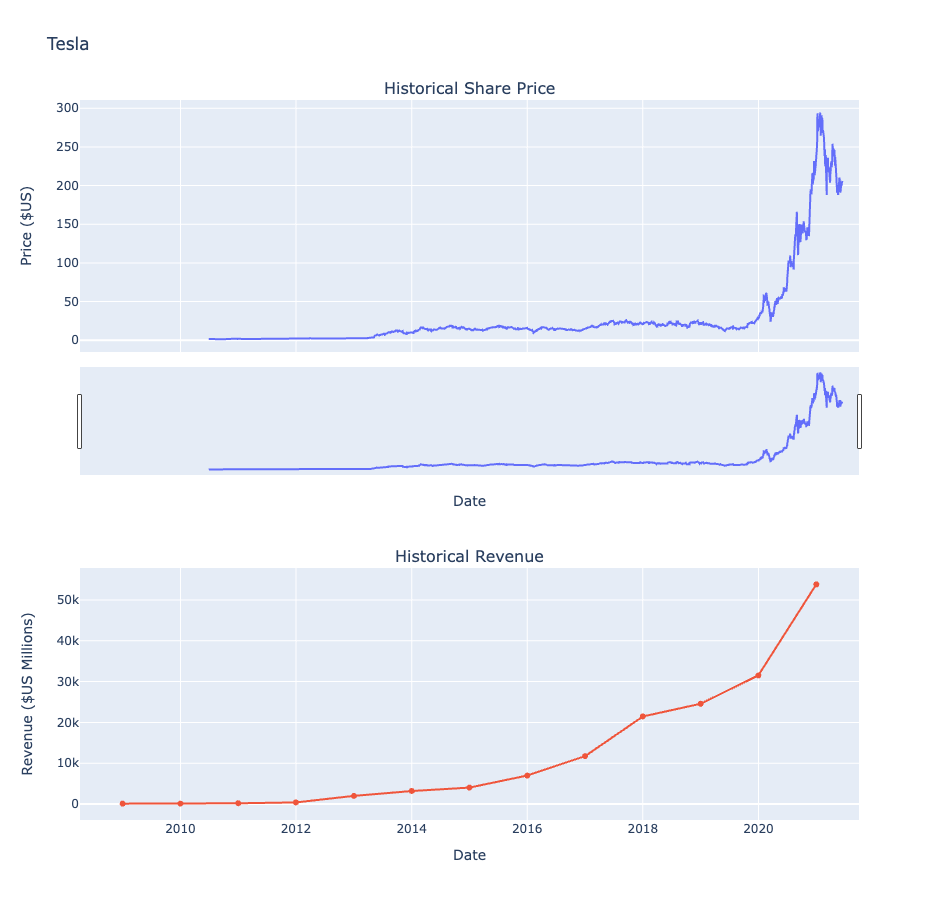

In [94]:
make_graph(tesla_share_price_data, tesla_revenue, 'Tesla')

Question 6: Plot Gamestop Stock Graph

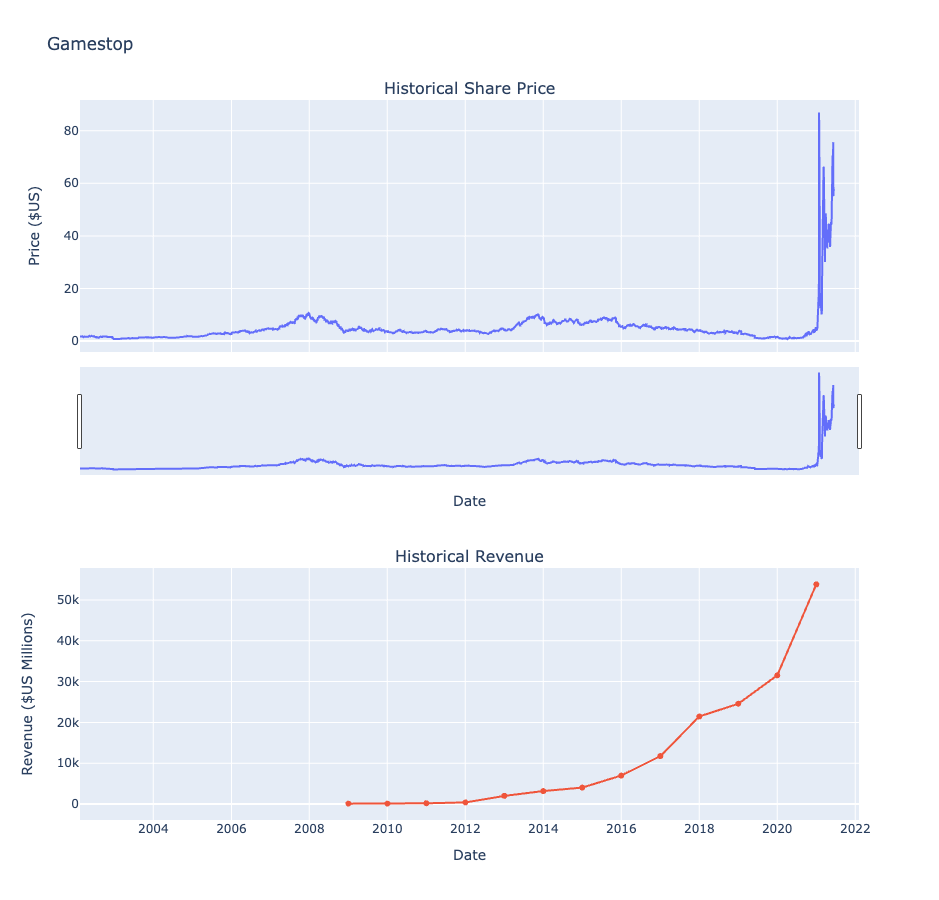

In [95]:
make_graph(gme_share_price_data, gme_revenue, 'Gamestop')

**Author**

Shreyaskumar Bhat